In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [4]:
#reading csvs from cleaned data set
cleaned_pop_df = pd.read_csv("../CleanedData/cleaned_population.csv")
cleaned_rental_df = pd.read_csv("../CleanedData/cleaned_rental.csv")
cleaned_housing_df = pd.read_csv("../CleanedData/cleaned_inventory.csv")

#top&bottom csvs
TP1819 = pd.read_csv("../TopBottom/mostchangedpop18-19.csv")
TP1920 = pd.read_csv("../TopBottom/mostchangedpop19-20.csv")
BP1819 = pd.read_csv("../TopBottom/leastchangedpop18-19.csv")
BP1920 = pd.read_csv("../TopBottom/leastchangedpop19-20.csv")
T_house = pd.read_csv("../TopBottom/top10inventory.csv")
B_house = pd.read_csv("../TopBottom/bottom10inventory.csv")
T_rental = pd.read_csv("../TopBottom/top10rental.csv")
B_rental = pd.read_csv("../TopBottom/bottom10rental.csv")

#data set with changing rates
population_df = pd.read_csv("../PopRelated/sorted_population.csv")
rental_df = pd.read_csv("../QuestionsAnalysis/rental_rate.csv")
housing_df = pd.read_csv("../QuestionsAnalysis/housing_rate.csv")

In [3]:
#finding common cities in all three data set
pop = population_df[["City", "State"]]
ren = rental_df[["City", "State"]]
hou = housing_df[["City", "State"]]

commons = ren.merge(pop, on="City", how="left")
common= commons.merge(hou, on="City", how="left")
common = common["City"].unique()

#collecting data from each data set 
newList = []
for index,row in population_df.iterrows():
    for city in common:
        if city in row["City"]:
            newList.append({
                "city":row["City"],
                "PDR1819": row["2018-2019 Population Rate"],
                "PDR1920": row["2019-2020 Population Rate"],
                
            })
newHousing=[ ] 
for index,row in housing_df.iterrows():
    for city in common:
        if city in row["City"]:
            newHousing.append({
                "city":row["City"],
                "HDR1819": row["2018-2019 changing rate"],
                "HDR1920": row["2019-2020 changing rate"]
                
            })

newRental = [ ] 
for index,row in rental_df.iterrows():
    for city in common:
        if city in row["City"]:
            newRental.append({
                "city":row["City"],
                "RDR1819": row["2018-2019 changing rate"],
                "RDR1920": row["2019-2020 changing rate"]
                               })
            
#converting collected data into dataframe 
newList = pd.DataFrame(newList)
newHousing = pd.DataFrame(newHousing)
newRental = pd.DataFrame(newRental)

#combining the dataframs into one
newList["HDR1819"]=newHousing["HDR1819"]
newList["HDR1920"]=newHousing["HDR1920"]
newList["RDR1819"]=newRental["RDR1819"]
newList["RDR1920"]=newRental["RDR1920"]
newList.to_csv("ChangingRates.csv")
newList

,city,PDR1819,PDR1920,HDR1819,HDR1920,RDR1819,RDR1920
0,Salt Lake City,0.065857,6.381907,2.014300,-0.280364,2.314455,-0.639372
1,Miami,1.111450,3.937277,1.519817,5.104837,3.534751,1.173697
2,Seattle,1.541291,3.909112,4.593249,3.079616,2.377688,0.673756
3,Tampa,0.621299,3.503628,1.021659,1.288111,3.263806,1.545500
4,Atlanta,1.731894,3.339904,5.193249,2.829788,3.209798,1.773491
...,...,...,...,...,...,...,...
76,Omaha,0.187094,-1.566316,7.840001,5.444049,5.276257,4.463610
77,Baton Rouge,-0.879428,-1.605096,1.711111,2.227123,2.645242,1.842762
78,Pittsburgh,-0.094487,-1.806944,3.386228,2.794442,2.975016,5.000586
79,St. Louis,-0.936988,-2.257000,4.821787,7.206758,4.970421,4.126580


The r-value is: 0.05102418270220029.
The correlation is -0.23


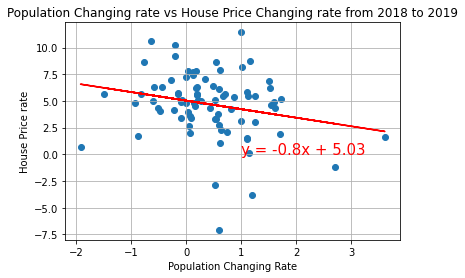

In [4]:
#plotting scatter plot w/ linear regression "Population vs House Price 2018-2019"
fig, ax=plt.subplots(1)
x_values = newList["PDR1819"]
y_values = newList["HDR1819"]

plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')

plt.title("Population Changing rate vs House Price Changing rate from 2018 to 2019")
plt.xlabel("Population Changing Rate")
plt.ylabel("House Price rate")
plt.annotate(line_eq,(1,0), fontsize=15,color="red")
plt.grid()
plt.show()

The r-value is: 0.112426696572543.
The correlation is -0.34


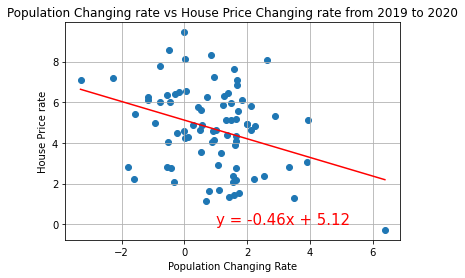

In [5]:
#plotting scatter plot w/ linear regression "Population vs House Price 2018-2019"
fig, ax=plt.subplots(1)
x_values = newList["PDR1920"]
y_values = newList["HDR1920"]

plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')

plt.title("Population Changing rate vs House Price Changing rate from 2019 to 2020")
plt.xlabel("Population Changing Rate")
plt.ylabel("House Price rate")
plt.annotate(line_eq,(1,0), fontsize=15,color="red")
plt.grid()
plt.show()

In [6]:
#choosing top10 cities with the highest population changing rate
TP1819P= TP1819.iloc[:11]

#calculating house price changing rate
T_house["2018-2019 changing rate"]=''
T_house["2019-2020 changing rate"]=''

for row in T_house:
    rate_18 = ((T_house['Yearly Average of Top 10 in 2019']- T_house['Yearly Average of Top 10 in 2018'])/T_house['Yearly Average of Top 10 in 2019'])*100
    T_house['2018-2019 changing rate'] = rate_18
    rate_19 = ((T_house['Yearly Average of Top 10 in 2020']- T_house['Yearly Average of Top 10 in 2019'])/T_house['Yearly Average of Top 10 in 2020'])*100
    T_house['2019-2020 changing rate'] = rate_19

T_house1819 = T_house.sort_values(by=['2018-2019 changing rate'], ascending = False) 
T_house1819.head()


,Unnamed: 0,Top 10 in 2018,Yearly Average of Top 10 in 2018,Top 10 in 2019,Yearly Average of Top 10 in 2019,Top 10 in 2020,Yearly Average of Top 10 in 2020,2018-2019 changing rate,2019-2020 changing rate
5,53,Urban Honolulu,569136.500000,Urban Honolulu,588969.833333,Urban Honolulu,610928.125,3.367462,3.594251
9,9,Boston,444998.583333,Boston,457333.333333,Boston,493698.500,2.697103,7.365865
7,14,Seattle,470682.166667,Seattle,482437.833333,Seattle,514181.875,2.436722,6.173699
6,102,Boulder,529858.833333,Boulder,539750.000000,Boulder,552175.000,1.832546,2.250192
2,1,Los Angeles,635083.333333,Los Angeles,646458.333333,Los Angeles,677937.500,1.759587,4.643373


The r-value is: 0.4601379962677572.
The correlation is 0.68


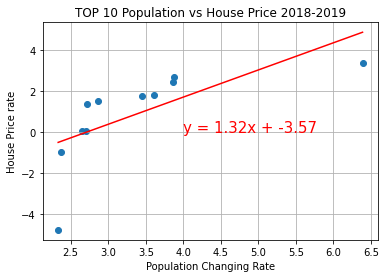

In [7]:
#plotting scatter plot w/ linear regression "TOP 10 Population vs House Price 2018-2019"
fig, ax=plt.subplots(1)
x_values = TP1819P["2018-2019 Population Rate"]
y_values = T_house1819["2018-2019 changing rate"]

plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')

plt.title("TOP 10 Population vs House Price 2018-2019")
plt.xlabel("Population Changing Rate")
plt.ylabel("House Price rate")
plt.annotate(line_eq,(4,0), fontsize=15,color="red")
plt.grid()
plt.show()

In [15]:
newList.head()

,city,PDR1819,PDR1920,HDR1819,HDR1920,RDR1819,RDR1920
0,Salt Lake City,0.065857,6.381907,2.014300,-0.280364,2.314455,-0.639372
1,Miami,1.111450,3.937277,1.519817,5.104837,3.534751,1.173697
2,Seattle,1.541291,3.909112,4.593249,3.079616,2.377688,0.673756
3,Tampa,0.621299,3.503628,1.021659,1.288111,3.263806,1.545500
4,Atlanta,1.731894,3.339904,5.193249,2.829788,3.209798,1.773491


The r-value is: 0.5202122051587859.
The correlation is -0.72


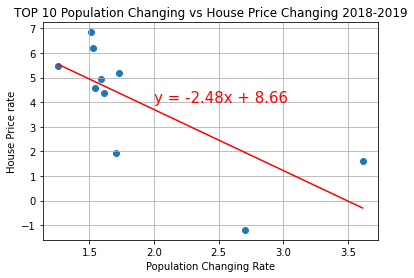

In [29]:
#sorting data by 2018-2019 values based on the population changes
PT1819 = newList.nlargest(10, 'PDR1819')

#plotting scatter plot w/ linear regression "TOP 10 Population vs House Price 2018-2019"
fig, ax=plt.subplots(1)
x_values = PT1819["PDR1819"]
y_values = PT1819["HDR1819"]

plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')

plt.title("TOP 10 Population Changing vs House Price Changing 2018-2019")
plt.xlabel("Population Changing Rate")
plt.ylabel("House Price rate")
plt.annotate(line_eq,(2,4), fontsize=15,color="red")
plt.grid()
plt.show()

The r-value is: 0.2910070916114012.
The correlation is -0.54


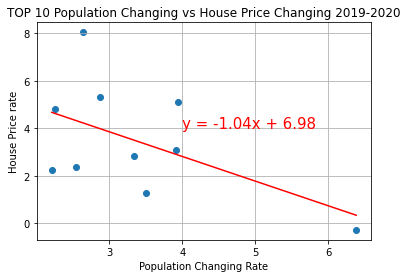

In [30]:
#sorting data by 2019-2020 values based on the population changes
PT1920 = newList.nlargest(10, 'PDR1920')

#plotting scatter plot w/ linear regression "TOP 10 Population vs House Price 2019-2020"
fig, ax=plt.subplots(1)
x_values = PT1920["PDR1920"]
y_values = PT1920["HDR1920"]

plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')

plt.title("TOP 10 Population Changing vs House Price Changing 2019-2020")
plt.xlabel("Population Changing Rate")
plt.ylabel("House Price rate")
plt.annotate(line_eq,(4,4), fontsize=15,color="red")
plt.grid()
plt.show()



The r-value is: 0.28149724039687085.
The correlation is 0.53


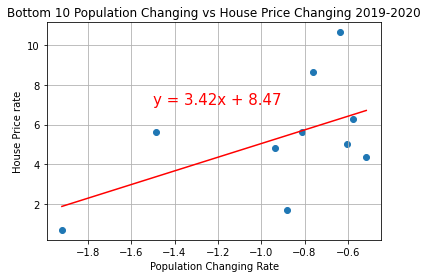

In [31]:
#sorting data by 2018-2019 values based on the population changes
PT1819 = newList.nsmallest(10, 'PDR1819')

#plotting scatter plot w/ linear regression "Bottom 10 Population vs House Price 2018-2019"
fig, ax=plt.subplots(1)
x_values = PT1819["PDR1819"]
y_values = PT1819["HDR1819"]

plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')

plt.title("Bottom 10 Population Changing vs House Price Changing 2019-2020")
plt.xlabel("Population Changing Rate")
plt.ylabel("House Price rate")
plt.annotate(line_eq,(-1.5,7), fontsize=15,color="red")
plt.grid()
plt.show()



The r-value is: 0.003712448631468345.
The correlation is -0.06


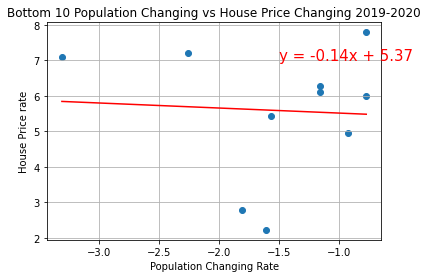

In [32]:
#sorting data by 2019-2020 values based on the population changes
PT1920 = newList.nsmallest(10, 'PDR1920')

#plotting scatter plot w/ linear regression "Bottom 10 Population vs House Price 2019-2020"
fig, ax=plt.subplots(1)
x_values = PT1920["PDR1920"]
y_values = PT1920["HDR1920"]

plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')

plt.title("Bottom 10 Population Changing vs House Price Changing 2019-2020")
plt.xlabel("Population Changing Rate")
plt.ylabel("House Price rate")
plt.annotate(line_eq,(-1.5,7), fontsize=15,color="red")
plt.grid()
plt.show()

